In [1]:
from sympy import *
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
# def sec(C):
#     sec = 1/2 * (trace(C)**2 - trace(C**2))
#     return sec

In [3]:
# Identity tensor
I = eye(3)

# Direction vector
e1 = I[:,0]
e2 = I[:,1]
e3 = I[:,2]

In [4]:
# Dilatation coefficients (Poisson's ratio:https://en.wikipedia.org/wiki/Poisson%27s_ratio - Length change)
u, Nu, Mu   = symbols(r'u \nu \mu', positive=True)

LambdaH = 1             # Coefficient for homogeneous dilatation
LambdaX = u **(-Nu)     # Coefficient for lengthening in e1 direction (here <1)
LambdaY = u **(-Nu)     # Coefficient for lengthening in e2 direction (here <1)
LambdaZ = u             # Coefficient for lengthening in e3 direction (here >1)

In [5]:
# Deformation matrices
U = I + (LambdaX-1) * np.outer(e1,e1) + (LambdaY-1) * np.outer(e2,e2) + (LambdaZ-1) * np.outer(e3,e3)

# Gradient of the deformation
F = (LambdaH-1) * I + U

# Right Cauchy-Green strain tensor
C = transpose(F) * F

In [6]:
# Eigenvalues of Right Cauchy-Green strain tensor
Lambda1, Lambda2, Lambda3 = symbols(r'\lambda_1 \lambda_2 \lambda_3')

# Invariants
J = Function('J')(Lambda1,Lambda2,Lambda3)
JFunction = Lambda1*Lambda2*Lambda3

I1 = Function('I_1')(Lambda1,Lambda2,Lambda3)
I1Function = Lambda1**2+Lambda2**2+Lambda3**2

I2 = Function('I_2')(Lambda1,Lambda2,Lambda3)
I2Function = Lambda1**2*Lambda2**2 + Lambda2**2*Lambda3**2 + Lambda3**2*Lambda1**2

# Hyperelastic models (compressible)

# Neo-Hookean
C01, D1      = symbols(r'C_{01} D_{1}', positive=True)
C01Function  = Mu / 2
D1Function   = Mu*Nu / (1 - 2*Nu)
Psi_NH       = C01 * (J**Rational(-2,3)*I1 - 3) + D1 * (J-1)**2

# Mooney-Rivlin
C01, C10, D1 = symbols(r'C_{01} C_{10} D_{1}', positive=True)
C01Function  = Mu / 2 - C10
D1Function   = Mu * (1+Nu) / (3*(1-2*Nu))
Psi_MR       = C10 * (J**Rational(-4,3)*I2 - 3) + C01 * (J**Rational(-2,3)*I1 - 3) + D1 * (J-1)**2


Psis = [Psi_NH, Psi_MR]
Psi  = Psis[1]
display(Psi)

C_{01}*(I_2(\lambda_1, \lambda_2, \lambda_3)/J(\lambda_1, \lambda_2, \lambda_3)**(4/3) - 3) + C_{10}*(I_1(\lambda_1, \lambda_2, \lambda_3)/J(\lambda_1, \lambda_2, \lambda_3)**(2/3) - 3) + D_{1}*(J(\lambda_1, \lambda_2, \lambda_3) - 1)**2

In [7]:
# Derivative with respect to Lambdas (https://en.wikipedia.org/wiki/Hyperelastic_material: compressible isotropic hyperelastic material)
PsiLambda = Psi.subs({J:JFunction,I1:I1Function,I2:I2Function})

T1 = Lambda1*Derivative(PsiLambda, Lambda1)/(Lambda1*Lambda2*Lambda3)
T1 = T1.doit()

T2 = Lambda2*Derivative(PsiLambda, Lambda2)/(Lambda1*Lambda2*Lambda3)
T2 = T2.doit()

T3 = Lambda3*Derivative(PsiLambda, Lambda3)/(Lambda1*Lambda2*Lambda3)
T3 = T3.doit()

T = T1 * np.outer(e1,e1) + T2 *np.outer(e2,e2) + T3 * np.outer(e3,e3)     # Add the pressure p for incompressibility
T = Matrix(T).doit()
T = T.subs({JFunction:J,I1Function:I1,I2Function:I2})
T = simplify(T)
T = T.subs({JFunction:J,I1Function:I1,I2Function:I2})
T = T.subs({J:'J',I1:'I_1',I2:'I_2'})
display(T)

Matrix([
[(2*C_{01}*J**(8/3)*(-2*I_2 + 3*\lambda_1**2*(\lambda_2**2 + \lambda_3**2)) + 2*C_{10}*J**(10/3)*(-I_1 + 3*\lambda_1**2) + 6*D_{1}*J**5*(J - 1))/(3*J**5),                                                                                                                                                        0,                                                                                                                                                        0],
[                                                                                                                                                       0, (2*C_{01}*J**(8/3)*(-2*I_2 + 3*\lambda_2**2*(\lambda_1**2 + \lambda_3**2)) + 2*C_{10}*J**(10/3)*(-I_1 + 3*\lambda_2**2) + 6*D_{1}*J**5*(J - 1))/(3*J**5),                                                                                                                                                        0],
[                                                              

In [8]:
# Replace invariants
T = T.subs({'J':JFunction,'I_1':I1Function,'I_2':I2Function})
display(T)
# Replace material constants
T = T.subs({C01:C01Function,D1:D1Function})
display(T)
# Replace Eingenvalues
Lambdas = C.eigenvals()
Lambdas = list(Lambdas)
T = T.subs({Lambda1:Lambdas[0], Lambda2:Lambdas[0], Lambda3:Lambdas[1]})
display(T)
# T11 and T22 is null
T = T - T[0,0] * I
T = simplify(T)
display(T)

Matrix([
[(2*C_{01}*(\lambda_1*\lambda_2*\lambda_3)**(8/3)*(-2*\lambda_1**2*\lambda_2**2 - 2*\lambda_1**2*\lambda_3**2 + 3*\lambda_1**2*(\lambda_2**2 + \lambda_3**2) - 2*\lambda_2**2*\lambda_3**2) + 2*C_{10}*(\lambda_1*\lambda_2*\lambda_3)**(10/3)*(2*\lambda_1**2 - \lambda_2**2 - \lambda_3**2) + 6*D_{1}*\lambda_1**5*\lambda_2**5*\lambda_3**5*(\lambda_1*\lambda_2*\lambda_3 - 1))/(3*\lambda_1**5*\lambda_2**5*\lambda_3**5),                                                                                                                                                                                                                                                                                                                                                                                                                              0,                                                                                                                                                                

Matrix([
[(2*C_{10}*(\lambda_1*\lambda_2*\lambda_3)**(10/3)*(2*\lambda_1**2 - \lambda_2**2 - \lambda_3**2) + 6*\lambda_1**5*\lambda_2**5*\lambda_3**5*\mu*(\nu + 1)*(\lambda_1*\lambda_2*\lambda_3 - 1)/(3 - 6*\nu) + 2*(\lambda_1*\lambda_2*\lambda_3)**(8/3)*(-C_{10} + \mu/2)*(-2*\lambda_1**2*\lambda_2**2 - 2*\lambda_1**2*\lambda_3**2 + 3*\lambda_1**2*(\lambda_2**2 + \lambda_3**2) - 2*\lambda_2**2*\lambda_3**2))/(3*\lambda_1**5*\lambda_2**5*\lambda_3**5),                                                                                                                                                                                                                                                                                                                                                                                                                                                             0,                                                                                                  

Matrix([
[u**(20*\nu)*(2*C_{10}*u**(20/3)*u**(-40*\nu/3)*(-u**4 + u**(-4*\nu)) + 6*\mu*u**10*u**(-20*\nu)*(\nu + 1)*(u**2*u**(-4*\nu) - 1)/(3 - 6*\nu) + 2*u**(16/3)*u**(-32*\nu/3)*(-C_{10} + \mu/2)*(-4*u**4*u**(-4*\nu) + 3*u**(-4*\nu)*(u**4 + u**(-4*\nu)) - 2*u**(-8*\nu)))/(3*u**10),                                                                                                                                                                                                                                                                                 0,                                                                                                                                                                                                                                              0],
[                                                                                                                                                                                                      

Matrix([
[0, 0,                                                                                                                                                            0],
[0, 0,                                                                                                                                                            0],
[0, 0, u**(4*\nu/3 - 26/3)*(2*C_{10}*u**4 - 2*C_{10}*u**(4*\nu/3 + 16/3) - 2*C_{10}*u**(4*\nu + 8) + 2*C_{10}*u**(16*\nu/3 + 28/3) - \mu*u**4 + \mu*u**(4*\nu + 8))]])

In [9]:
# Other stresses
J = det(F)                                    # Volume change
P = J * T * F.inv().transpose()               # Nominal stress
S = J * F.inv() * T * F.inv().transpose()     # Material stress
display(S)

Matrix([
[0, 0,                                                                                                                                                                          0],
[0, 0,                                                                                                                                                                          0],
[0, 0, u**(-2*\nu)*u**(4*\nu/3 - 26/3)*(2*C_{10}*u**4 - 2*C_{10}*u**(4*\nu/3 + 16/3) - 2*C_{10}*u**(4*\nu + 8) + 2*C_{10}*u**(16*\nu/3 + 28/3) - \mu*u**4 + \mu*u**(4*\nu + 8))/u]])

In [10]:
# Define axial responses
if Psi == Psis[0]:
    NH = lambdify((Nu, Mu, u), P[2,2], 'numpy')
elif Psi == Psis[1]:
    MR = lambdify((C10, Nu, Mu, u), P[2,2], 'numpy')

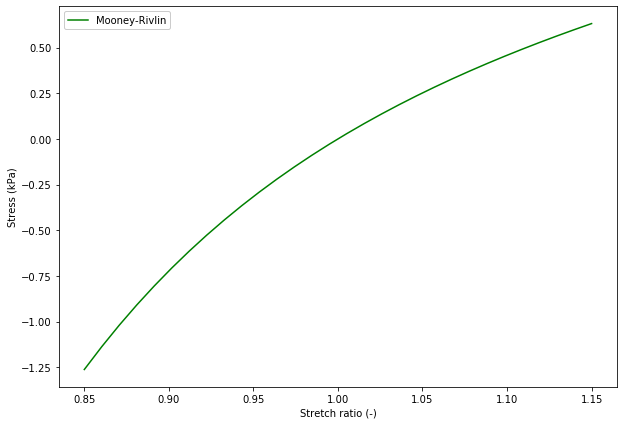

In [12]:
# Plot Results

NuV = 0.4
MuV = 1

C10V = 0.1

Xmin = 0.85
Xmax = 1.15
Delta = 0.01
U33 = np.linspace(Xmin,Xmax,int((Xmax-Xmin)/Delta+1))

plt.rc('figure', figsize=[10,7])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.cla()
# ax.plot(U33, NH(NuV, MuV, U33),  color = 'k', linestyle = '-', label='Neo-Hookean')
ax.plot(U33, MR(C10V, NuV, MuV, U33),  color = 'g', linestyle = '-', label='Mooney-Rivlin')
# ax.plot(U33, Gn(Nu,U33),  color = 'b', linestyle = '-', label='Gent')
# ax.plot(U33, Dm(Nu,U33),  color = 'c', linestyle = '-', label='Demiray')
# ax.plot(U33, Og(Nu,U33),  color = 'r', linestyle = '-', label='Ogden')
ax.set_xlabel('Stretch ratio (-)')
ax.set_ylabel('Stress (kPa)')
# plt.xlim([0.8, 1.2])
# plt.ylim([1, 3])
plt.legend(loc='upper left', frameon=True, framealpha=1)
plt.show()